<a href="https://colab.research.google.com/github/Sanarazaaa/Data-Analysis-Using-Python/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # visualizing data
import seaborn as sns
!pip install lux  # importing lux for data exploration

# Display plots inline
%matplotlib inline

# If you have uploaded the CSV file, you can load it like this:
df = pd.read_csv('your_file.csv', encoding='unicode_escape')

# Display the dataframe with Lux enabled
df


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.5 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11961 sha256=cdcf757e73bfd8b316c16b452ce4d5145abc3f97392f6ee5f2b3a666db0406a3
  Stored in directory: /root/.cache/pip/wheels/e8/23/56/ad9393d57959f25ca5a7d6e55cb280cd1f9affbc987e2fbd26
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185606 sha256=8aa3800966ab1abda7113660e267504484c240daa6858ffd5fc80f77ff6abcda
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5fcd31

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [5]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Once uploaded, read the file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)), encoding='unicode_escape')

# Display the first few rows of the dataframe
df.head()


Saving Diwali Sales Data.csv to Diwali Sales Data.csv


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# Drop the specified columns from the dataframe
df = df.drop(columns=['Status', 'unnamed1'])

# Display the updated dataframe
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
# Check for missing values in the dataset
df.isnull().sum()

df.dropna(inplace=True)  # Drop rows with missing values


<Axes: title={'center': 'Amount Distribution'}, xlabel='Age Group', ylabel='Frequency'>

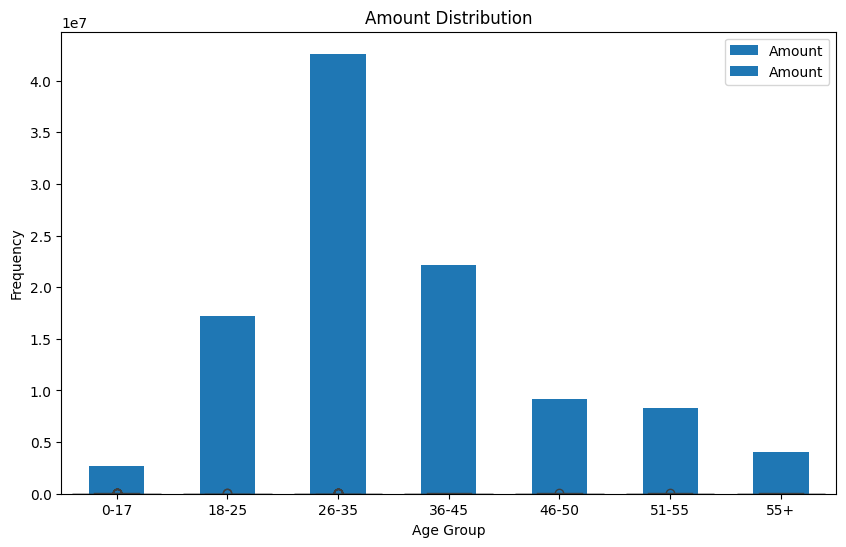

In [8]:
# Bar Plot for Age vs Amount
sales_age = df.groupby('Age Group')['Amount'].sum()
sales_age.plot(kind='bar', figsize=(10, 6), title='Total Amount vs Age Group')

# Histogram for Amount Distribution
df['Amount'].plot(kind='hist', bins=20, figsize=(10, 6), title='Amount Distribution')

# Boxplot for Amount to identify outliers
sns.boxplot(x='Age Group', y='Amount', data=df)


Numerical columns: Index(['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount'], dtype='object')

Correlation Matrix:

                 User_ID       Age  Marital_Status    Orders    Amount
User_ID         1.000000  0.022338        0.004345 -0.016022 -0.011997
Age             0.022338  1.000000       -0.012344  0.008090  0.030941
Marital_Status  0.004345 -0.012344        1.000000 -0.003487 -0.017493
Orders         -0.016022  0.008090       -0.003487  1.000000 -0.013183
Amount         -0.011997  0.030941       -0.017493 -0.013183  1.000000


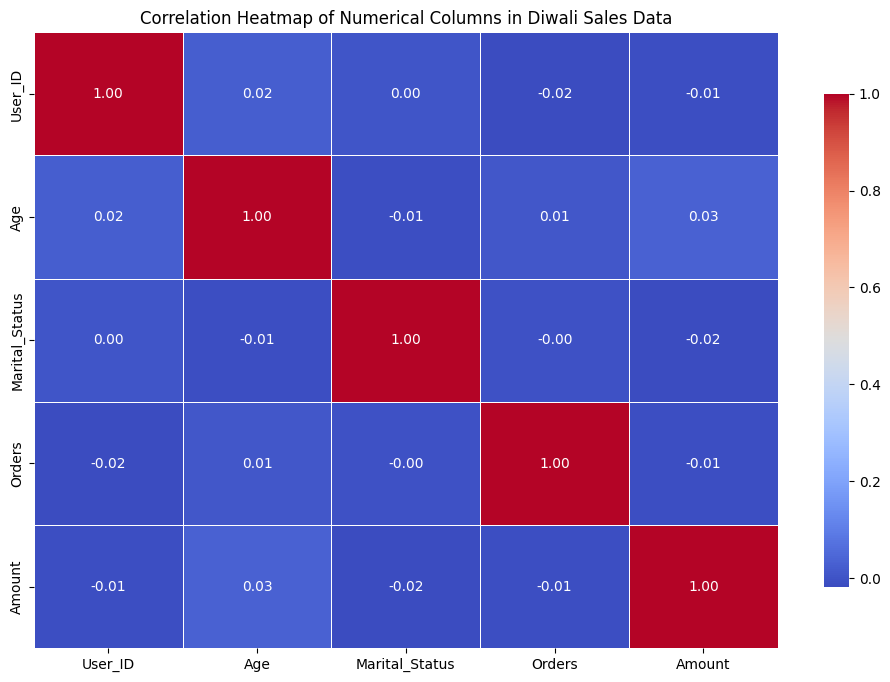

In [10]:
# Step 1: Check for the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_cols)

# Step 2: Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Step 3: Print the correlation matrix as text
print("\nCorrelation Matrix:\n")
print(correlation_matrix.to_string())  # Display the correlation matrix in text format

# Step 4: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .8})

# Step 5: Show the plot
plt.title('Correlation Heatmap of Numerical Columns in Diwali Sales Data')
plt.show()